In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [262]:
def reformat_google(file):
    # Get file
    filepath = '../files/'
    fileloc = filepath + file
    
    # Read csv and parse dates
    df = pd.read_csv(fileloc, header=1, parse_dates=[0])
    df.columns=['date', 'search']
    
    # Get ratio to pre-2020 mean
    pre_2020_mean = df.loc[df.date.dt.year != 2020].search.mean()
    df.search /= pre_2020_mean
    
    # Get month by month for seaborn's 95% confidence interval
    df.date = df.date.apply(lambda x: x.strftime('%Y-%m'))
    
    return df

In [263]:
cond = reformat_google('condolences_5_15.csv')
short = reformat_google('shortness_5_15.csv')
push = reformat_google('pushups_5_15.csv')
mask = reformat_google('mask_5_15.csv')

In [271]:
assert cond.shape == short.shape == push.shape == mask.shape

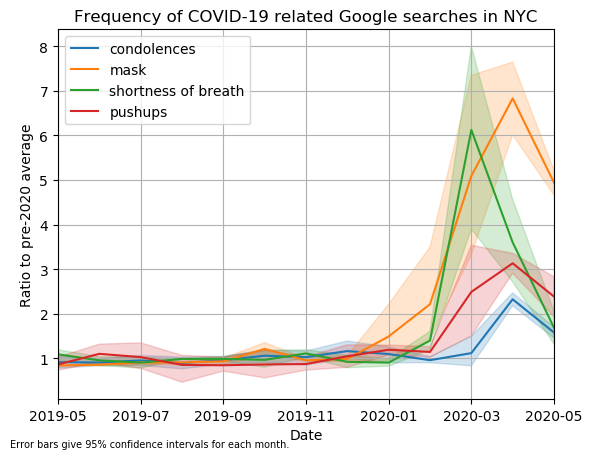

In [282]:
plt.style.use('default')
sns.lineplot(x='date', y='search', data=cond, label='condolences')
sns.lineplot(x='date', y='search', data=mask, label='mask')
sns.lineplot(x='date', y='search', data=short, label='shortness of breath')
sns.lineplot(x='date', y='search', data=push, label='pushups')

# Start from 12th month and show every 2 months
plt.xticks(list(range(12, cond.date.nunique(), 2)))  
plt.xlim(12, cond.date.nunique() - 1)

plt.xlabel('Date')
plt.ylabel('Ratio to pre-2020 average')
plt.legend()
plt.title('Frequency of COVID-19 related Google searches in NYC')
plt.grid(0.4)
# plt.tight_layout()
plt.figtext(0.05, 0.01, 'Error bars give 95% confidence intervals for each month.', 
            horizontalalignment='left', fontsize=7)
plt.savefig('plots/covid_searches.png', dpi=300)
plt.show()